In [7]:
import torch
import os 
import matplotlib.pyplot as plt

## Make the plots 

In [10]:


# Load the file
current_dir = os.getcwd()
filename = current_dir + "/robot_nav/robot_nav_sl.pt"
sl_results = torch.load(filename)
print(sl_results.keys())


dict_keys(['obj_val', 'opt_obj_val', 'slack_penalty', 'y_penalty', 'constraint_violation_magnitude', 'constraint_violation_count', 'constraint_violation_percentage', 'supervised_loss', 'bit_accuracy', 'optimality_gap'])


{'whiskers': [<matplotlib.lines.Line2D at 0x72f4d4a6a000>,
 'caps': [<matplotlib.lines.Line2D at 0x72f4d4a6a180>,
 'boxes': [<matplotlib.lines.Line2D at 0x72f4d4a69d00>],
 'medians': [<matplotlib.lines.Line2D at 0x72f4d4a6aa20>],
 'fliers': [<matplotlib.lines.Line2D at 0x72f4d4a6ad50>],
 'means': []}

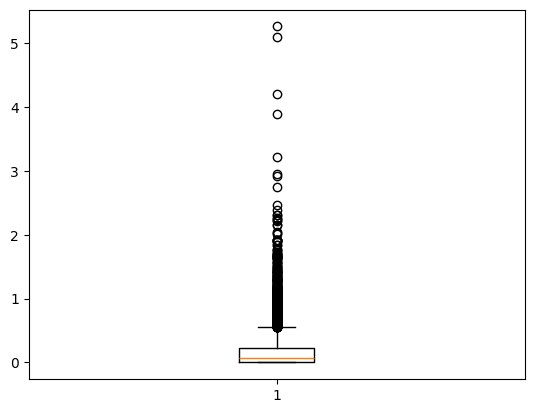

In [9]:
plt.boxplot(sl_results["constraint_violation_magnitude"])

{'whiskers': [<matplotlib.lines.Line2D at 0x72f4cdcfda90>,
 'caps': [<matplotlib.lines.Line2D at 0x72f4cdcfddf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x72f4cdcfd7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x72f4cdcfe390>],
 'fliers': [<matplotlib.lines.Line2D at 0x72f4cdcfe6c0>],
 'means': []}

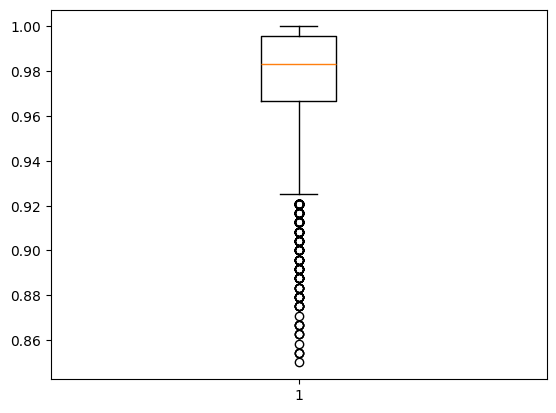

In [18]:
plt.boxplot(sl_results["bit_accuracy"])

In [ ]:
plt.boxplot(sl_results["optimality_gap"])

NameError: name 'optimality_gap' is not defined

In [16]:
sl_results["y_penalty"].shape

torch.Size([8391])